In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

In [2]:
data = pd.read_csv('TITANIC.csv')

In [3]:
data = data.drop('PassengerId', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Ticket', axis=1)
data = data.drop('Cabin', axis=1)
data = data.drop('Fare', axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [4]:
data["Age"] = data["Age"].fillna(data["Age"].median())

In [5]:
data["Survived"].fillna(data["Survived"].mode()[0], inplace=True)
data["Pclass"].fillna(data["Pclass"].mode()[0], inplace=True)
data["Sex"].fillna(data["Sex"].mode()[0], inplace=True)
data["SibSp"].fillna(data["SibSp"].mode()[0], inplace=True)
data["Parch"].fillna(data["Parch"].mode()[0], inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

In [6]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,28.0,1,2,S
889,1,1,male,26.0,0,0,C


In [7]:
data["Sex"] = data["Sex"].map({"male": 0, "female": 1}).astype(int)
data["Embarked"] = data["Embarked"].map({"C": 1, "Q": 2, "S":3}).astype(int)

In [8]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,3
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,3
3,1,1,1,35.0,1,0,3
4,0,3,0,35.0,0,0,3
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,3
887,1,1,1,19.0,0,0,3
888,0,3,1,28.0,1,2,3
889,1,1,0,26.0,0,0,1


In [9]:
dataAux = data
dataAux

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,3
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,3
3,1,1,1,35.0,1,0,3
4,0,3,0,35.0,0,0,3
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,3
887,1,1,1,19.0,0,0,3
888,0,3,1,28.0,1,2,3
889,1,1,0,26.0,0,0,1


<AxesSubplot:title={'center':'Matriz de correlação'}>

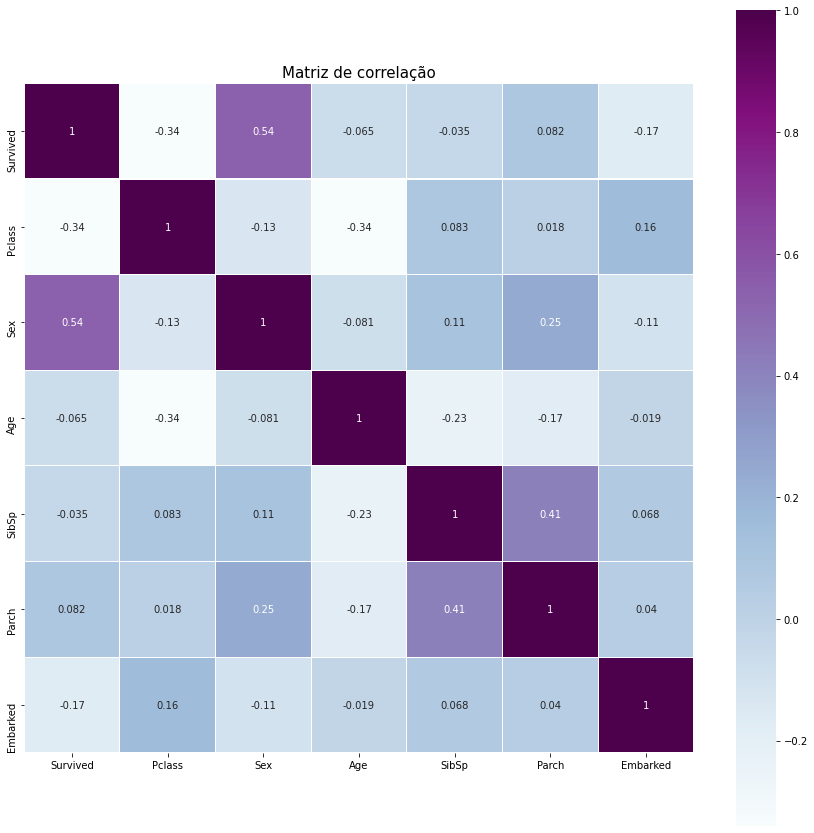

In [10]:

plt.figure(figsize=(15,15))
plt.title("Matriz de correlação", y=1, size=15)
sns.heatmap( dataAux.astype(float).corr(),linewidth=0.1, vmax=1.0, square=True, cmap="BuPu", linecolor="white", annot=True)

In [11]:
dataAux

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,3
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,3
3,1,1,1,35.0,1,0,3
4,0,3,0,35.0,0,0,3
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,3
887,1,1,1,19.0,0,0,3
888,0,3,1,28.0,1,2,3
889,1,1,0,26.0,0,0,1


In [12]:
X = dataAux[['Pclass', 'Sex', 'Age', 'Parch', 'Embarked']]
X = preprocessing.StandardScaler().fit_transform(X)
y = dataAux['Survived']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
res1 = knn1.predict(X_test)
print("Teste com n_neighbors = 5", metrics.accuracy_score(y_test, res1))
print(metrics.confusion_matrix(y_test, res1))

Teste com n_neighbors = 5 0.7988826815642458
[[94 14]
 [22 49]]


In [15]:
knn2 = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
res2 = knn1.predict(X_test)
print("Teste com n_neighbors = 10", metrics.accuracy_score(y_test, res2))
print(metrics.confusion_matrix(y_test, res2))

Teste com n_neighbors = 10 0.7988826815642458
[[94 14]
 [22 49]]


In [20]:
knn3 = KNeighborsClassifier(n_neighbors=20).fit(X_train,y_train)
res3 = knn3.predict(X_test)
print("Teste com n_neighbors = 20", metrics.accuracy_score(y_test, res3))
print(metrics.confusion_matrix(y_test, res3))

Teste com n_neighbors = 20 0.7877094972067039
[[101   7]
 [ 31  40]]
